# Alternation scan

In [45]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# import seaborn as sns



# from plotting.consts import (
#     ATTRS_DICT, FADED_LINE_COLOR, LABEL_COLOR, LIGHT_GREY_TEXT,
#     NULL_HEATMAP_COLOUR, TITLE_MAP, PLOT_WIDTH, PLOT_HEIGHT,
#     FULL_PAGE_WIDTH
# )

# from plotting.utils import (
#     # divergent_color_scale, get_shape_annotation,
#     # get_text_annotation, get_arrow_annotation,
#     grey_colorscale_discrete, grey_colorscale_discrete_N,
#     invisible_colorbar, my_colorbar_subplot, standard_layout,
#     grey_colorscale, my_colorbar, get_big_text_annotation
# )

# from param_scan.fns.config import config_rand
# from param_scan.fns.post_process import PostProcess

# from model.strategy_arrays import EqualResFreqBreakdownArray
# from model.simulator import RunSingleTactic

# from model.config_classes import SingleConfig

In [50]:
df = pd.read_csv('../outputs/paper/alt_scan_100_51.csv').iloc[:, 1:]
df

,RR,RS,SR,omega1,omega2,theta1,theta2,delta1,delta2,asex_alt_21,sex_alt_21,asex_alt_12,sex_alt_12,asex_mix,sex_mix
0,5.755119e-11,1.998247e-08,5.627950e-06,0.740827,0.955358,4.568288,4.697034,0.004298,0.028346,11.0,11.0,11.0,11.0,12.0,16.0
1,1.609538e-08,6.955392e-10,1.543864e-09,0.980957,0.588055,9.538581,11.011113,0.030180,0.006217,9.0,11.0,9.0,11.0,9.0,13.0
2,2.888600e-14,5.778628e-06,3.020126e-07,0.820451,0.978731,8.000067,11.116161,0.013812,0.020487,1.0,1.0,1.0,1.0,16.0,20.0
3,4.150904e-13,2.017379e-07,1.773728e-06,0.706497,0.935768,11.170345,5.004682,0.009834,0.005223,14.0,15.0,14.0,14.0,15.0,17.0
4,5.677527e-07,6.341311e-05,1.920408e-07,0.828890,0.818637,5.728716,11.810196,0.003884,0.011188,7.0,9.0,7.0,9.0,7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.489363e-08,2.359505e-09,1.393568e-09,0.831356,0.719790,10.955697,9.793901,0.017970,0.026080,1.0,1.0,1.0,1.0,8.0,11.0
96,4.143465e-13,1.712939e-10,9.105102e-09,0.706338,0.582308,6.429952,5.145377,0.004775,0.015517,14.0,15.0,15.0,15.0,15.0,21.0
97,1.057753e-11,1.051150e-05,6.628498e-05,0.570749,0.862730,6.391549,11.810681,0.031203,0.009758,1.0,1.0,5.0,5.0,6.0,6.0
98,5.140614e-13,2.475161e-06,2.530079e-07,0.868350,0.698725,4.951281,7.108476,0.015381,0.013691,1.0,1.0,1.0,1.0,15.0,20.0


In [51]:
(
    df
    .assign(
        mix_best_asex = lambda df: (
            (df.asex_mix >= df.asex_alt_21)
            &
            (df.asex_mix >= df.asex_alt_12)
        ),
        mix_best_sex = lambda df: (
            (df.sex_mix >= df.sex_alt_21)
            &
            (df.sex_mix >= df.sex_alt_12)
        ),
    )
    .loc[:, [
        'mix_best_sex',
        'mix_best_asex',
    ]]
    .value_counts()
)

mix_best_sex  mix_best_asex
True          True             100
dtype: int64

So 100% of the time mixture outperforms alternations whether in the sex or asex case.

<AxesSubplot:>

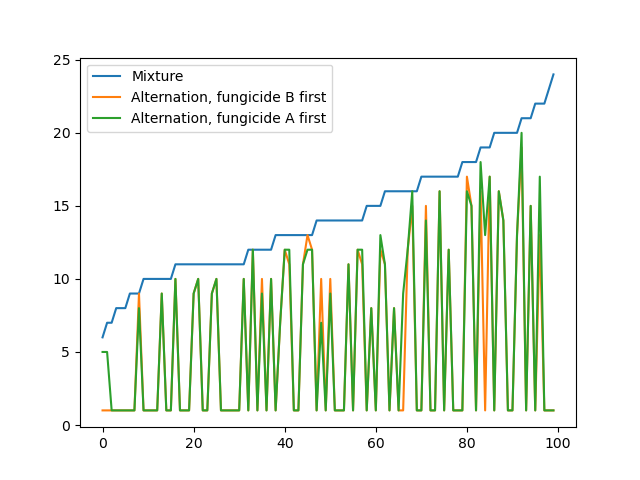

In [59]:
sorted_df = (
    df
    .loc[:, ['sex_mix', 'sex_alt_21', 'sex_alt_12']]
    .sort_values('sex_mix')
    .rename(columns={
        'sex_mix': 'Mixture',
        'sex_alt_21': 'Alternation, fungicide B first',
        'sex_alt_12': 'Alternation, fungicide A first',
    })
    .reset_index(drop=True)
    # .plot()
    # .describe()
)

sorted_df.plot()

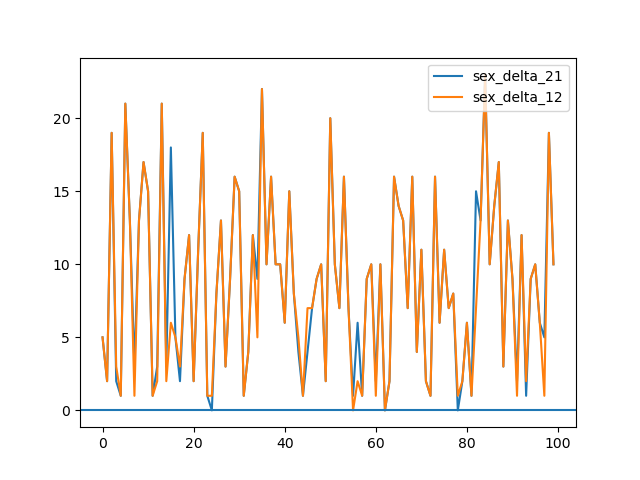

In [54]:
fig, ax = plt.subplots()

(
    df
    .assign(sex_delta_21 = lambda df: df.sex_mix - df.sex_alt_21,
            sex_delta_12 = lambda df: df.sex_mix - df.sex_alt_12,
           )
    .filter(like='sex_delta_')
    .plot(ax=ax)
)

ax.axhline(0)

In [60]:
import plotly.graph_objects as go

In [67]:
from plotting.utils import standard_layout
from plotting.consts import FULL_PAGE_WIDTH

In [75]:
sorted_df.index = sorted_df.index + 1

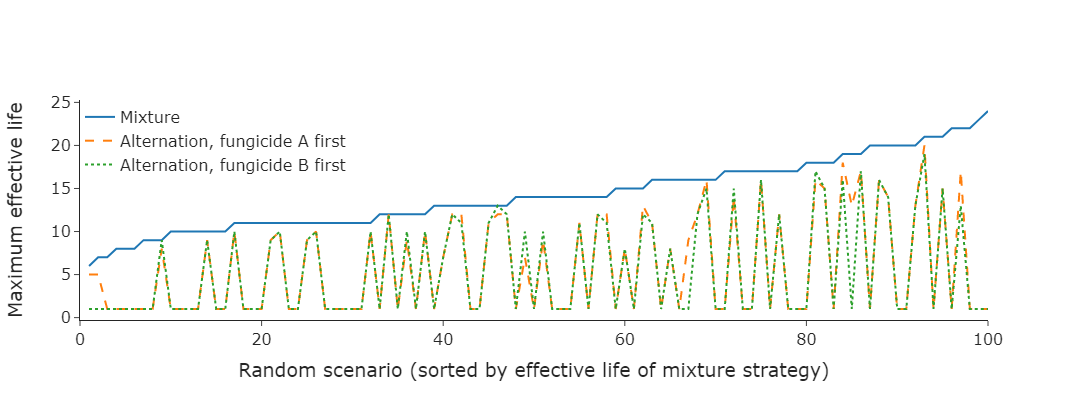

In [80]:
trc = [
    go.Scatter(x=sorted_df.index,
               y=sorted_df['Mixture'],
               name='Mixture',
              ),
    go.Scatter(x=sorted_df.index,
               y=sorted_df['Alternation, fungicide A first'],
               name='Alternation, fungicide A first',
               line=dict(dash='dash'),
              ),
    go.Scatter(x=sorted_df.index,
               y=sorted_df['Alternation, fungicide B first'],
               name='Alternation, fungicide B first',
               line=dict(dash='dot'),
              ),
]

fig = go.Figure(data=trc)

fig.update_layout(standard_layout(True, FULL_PAGE_WIDTH, 400))

fig.update_layout(legend=dict(x=0, y=1))

fig.update_xaxes(title="Random scenario (sorted by effective life of mixture strategy)",range=[0, 100], showgrid=False, zeroline=False)
fig.update_yaxes(title="Maximum effective life", showgrid=False, zeroline=False)

fig.write_image('../outputs/figures/paper_figs/alt_scan.png')

fig.show()